In [10]:
import os
import json
import pandas as pd

from news_article_classification.utils.paths import get_data_path

In [11]:
training_data_path = os.path.join(
    get_data_path(), 
    "CPS_use_case_classification_training.json"
)

articles = pd.read_json(training_data_path, lines=True)

#  <center> Distribution of Number of words in headlines </center>

<Axes: >

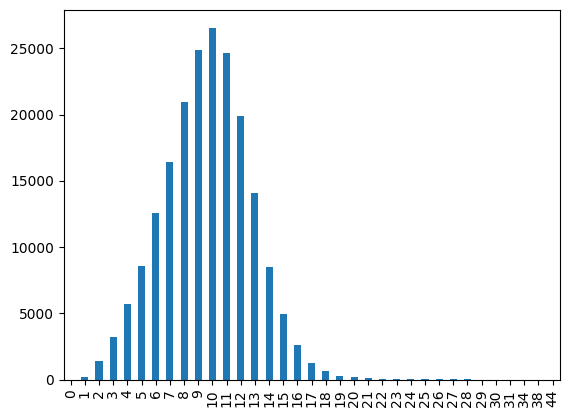

In [14]:
articles["headline"].str.split().apply(len).value_counts().sort_index().plot.bar()

<br></br>

#  <center> Class Distribution </center>

In [3]:
print(f"A total of {articles['category'].nunique()} classes")

A total of 42 classes


<Axes: title={'center': 'Class distribution (%)'}>

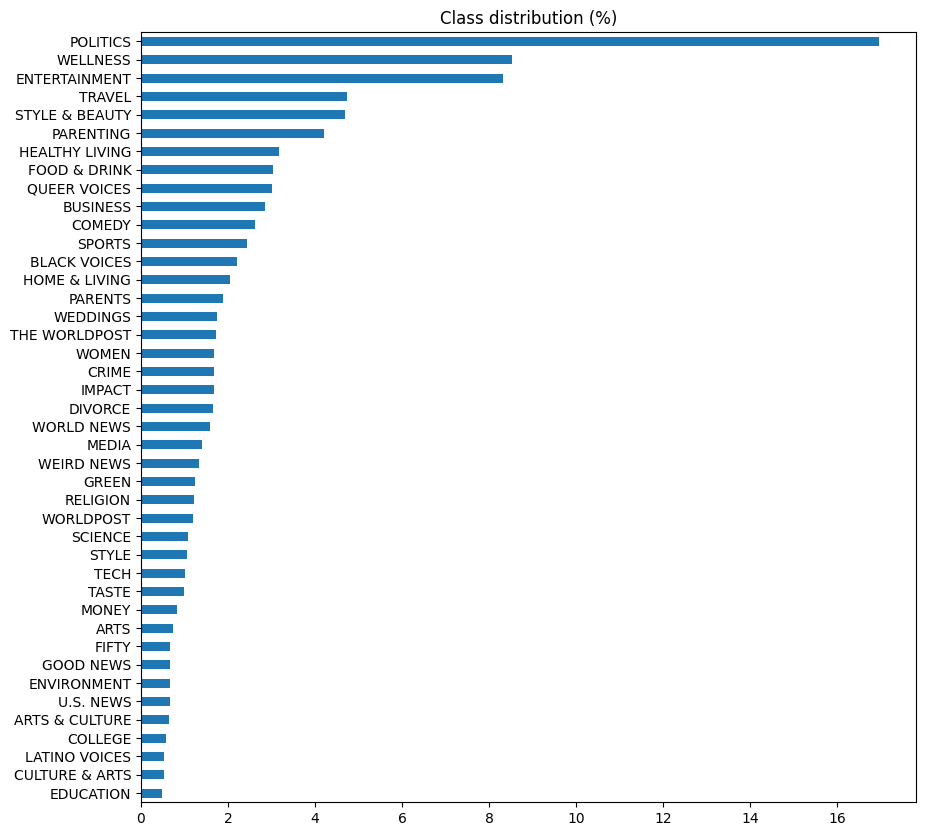

In [4]:
(
    (
        articles["category"]
        .value_counts(normalize=True)
        .sort_values() * 100
    )
     .plot
     .barh(figsize=(10,10), title="Class distribution (%)")
)


<br></br>

#### As the class distribution is heavily imablanced, corrective measures such as SMOTE or adjusted class weights would have to be used

<br></br>

#  <center> Refining classes </center>

#### Some of the classes could be merged together as the class labels are nearly identical or the classes are very similiar (See below). This would result in fewer classes which comprise less than 1% of the training data.

In [5]:
class_corrections = {
    # Nearly identical
    "WORLDPOST": "THE WORLDPOST",
    "CULTURE & ARTS": "ARTS & CULTURE",
    "ARTS": "ARTS & CULTURE",
    "PARENTS": "PARENTING",

    # Very similar
    "MONEY": "BUSINESS",
    "HEALTHY LIVING": "WELLNESS",
    "COLLEGE": "EDUCATION",
    "TASTE": "FOOD & DRINK",
    "STYLE": "STYLE & BEAUTY",
    "GREEN": "ENVIRONMENT"
    
}

In [6]:
articles.loc[:, "refined_category"] = articles["category"].replace(class_corrections)

<Axes: title={'center': 'Refined Class distribution (%)'}>

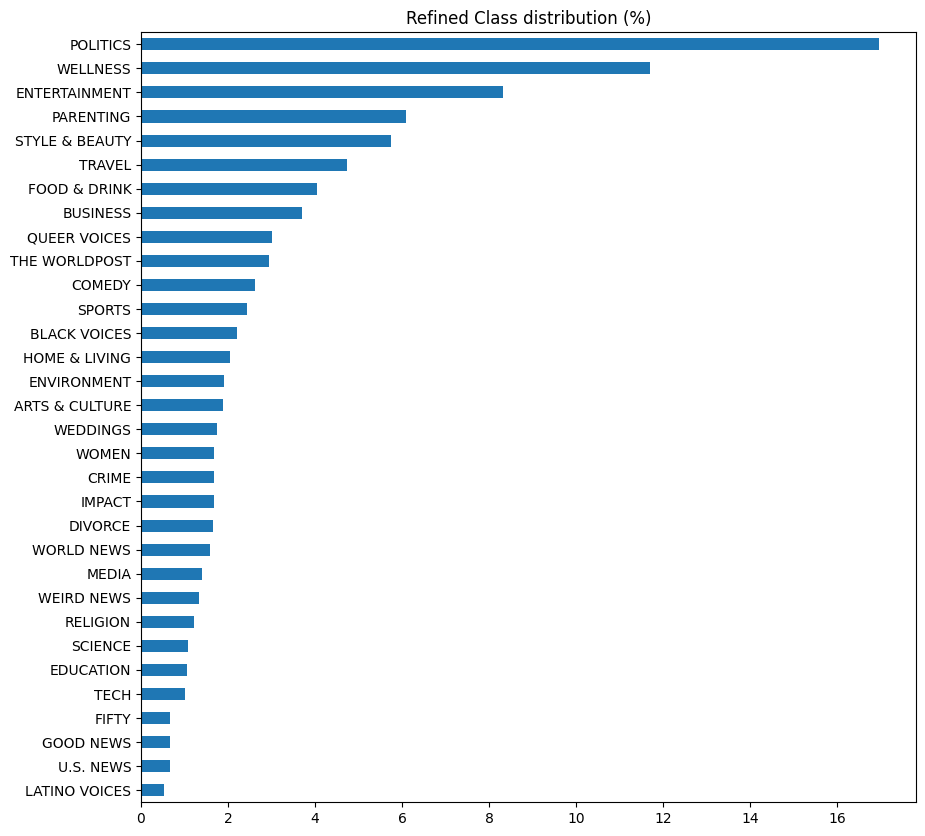

In [7]:
(
    (
        articles["refined_category"]
        .value_counts(normalize=True)
        .sort_values() * 100
    )
     .plot
     .barh(figsize=(10,10), title="Refined Class distribution (%)")
)


In [8]:
print(f"After mergers, only {articles['refined_category'].nunique()} classes remain")

After mergers, only 32 classes remain
